In [52]:
import json
import pandas as pd
import numpy as np

In [53]:
#papers_df is pandas dataframe object
papers_df = pd.read_json('NIP_DataSet/papers_2K.json',lines=True)
papers_df.rename(columns = {"paper_text" : "summary"},inplace=True)
papers_df.head()

,id,year,title,event_type,pdf_name,abstract,summary
0,1,1987,Self-Organization of Associative Database and ...,,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [54]:
print("Papers : ", papers_df.shape)

Papers :  (2000, 7)


In [55]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2000 non-null   int64 
 1   year        2000 non-null   int64 
 2   title       2000 non-null   object
 3   event_type  2000 non-null   object
 4   pdf_name    2000 non-null   object
 5   abstract    2000 non-null   object
 6   summary     2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english')

papers_df['summary'] = papers_df['summary'].fillna('')


In [22]:
tfv_matrix = tfv.fit_transform(papers_df['summary'])

In [23]:
def Find_Paper_Given_By_Keyword(words_array, keyword):
    index = words.index(keyword)
    the_most_used_on_paper_list = tfv_matrix[:, index].toarray()
    
    #Index the paper id and score
    count = 0
    the_most_used_on_paper_dict = {}
    for i in the_most_used_on_paper_list:
        the_most_used_on_paper_dict[count] = i
        count = count + 1 
        
    #Sort papers which have the most occurrence of  keyword that is given
    top_paper = {k: v for k, v in sorted(the_most_used_on_paper_dict.items(), key=lambda item: item[1],reverse=True)[:10]}
    
    #List in List [[paper_id,title,score]]
    title_list = []
    for i in top_paper.keys():
        title_list.append([i, papers_df.iloc[i].title, top_paper[i][0]])
    df = pd.DataFrame(title_list, columns = ['paper_id', 'title', 'score'])
    return df

In [24]:
words = tfv.get_feature_names()
df = Find_Paper_Given_By_Keyword(words, "algorithm")

In [25]:
df.head(10)

,paper_id,title,score
0,86,Learning Sparse Perceptrons,0.232483
1,213,An Apobayesian Relative of Winnow,0.224246
2,794,The Relaxed Online Maximum Margin Algorithm,0.222262
3,691,Convergence of the Wake-Sleep Algorithm,0.213280
4,1938,Deterministic Annealing Variant of the EM Algo...,0.205524
5,1222,On the Generalization Ability of On-Line Learn...,0.191564
6,1388,Efficient Sublinear-Regret Algorithms for Onli...,0.186942
7,1989,Convergence Properties of the K-Means Algorithms,0.186053
8,944,A New Approximate Maximal Margin Classificatio...,0.175122
9,1655,Learning Mixture of Gaussians with Streaming Data,0.171342


In [26]:
#The following code;
#Find the most common words in the corpus(papers_df['summary'])
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [56]:
vec = CountVectorizer(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
        ngram_range=(1, 3),
        stop_words = 'english').fit(papers_df['summary'])

In [57]:
bag_of_words = vec.transform(papers_df['summary'])

In [58]:
bag_of_words

<2000x265724 sparse matrix of type '<class 'numpy.int64'>'
	with 2993519 stored elements in Compressed Sparse Row format>

In [ ]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [49]:
words_freq

NameError: name 'words_freq' is not defined

In [27]:
top_n_paper_list = get_top_n_words(papers_df['summary'],10)

In [28]:
top_n_paper_df = pd.DataFrame(top_n_paper_list, columns = ["keyword","number"])

In [29]:
top_n_paper_df.head(10)

,keyword,number
0,learning,26625
1,model,23729
2,data,21095
3,function,16885
4,algorithm,16762
5,network,16679
6,neural,16365
7,set,16113
8,using,15392
9,time,14658


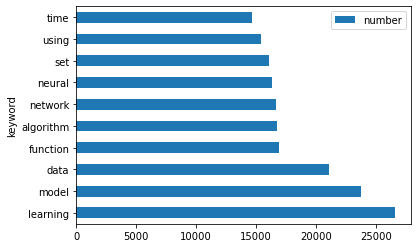

In [30]:
import matplotlib.pyplot as plt
top_n_paper_df.plot.barh(x ='keyword', y='number')
plt.show()

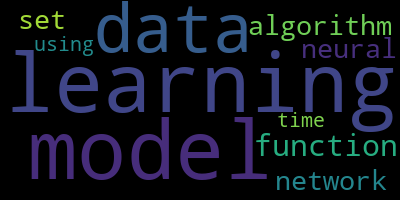

In [31]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(top_n_paper_df['keyword'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [32]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [33]:
sig[0]

array([0.76159574, 0.7615942 , 0.76159425, ..., 0.76159429, 0.76159427,
       0.76159423])

In [34]:
# Reverse mapping of indices and paper titles
indices = pd.Series(papers_df.index, index=papers_df['title']).drop_duplicates()

In [35]:
def give_rec(title, sig=sig):
    # Get the index corresponding to title

    title = 'Semi-supervised Learning with Ladder Networks'
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the paper 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar papers
    sig_scores = sig_scores[1:11]
    
    data = []
    count = 0
    while count<10:
        data.append([sig_scores[count][0],(papers_df['title'].iloc[sig_scores[count][0]]), sig_scores[count][1]])
        count=count+1

    df = pd.DataFrame(data, columns = ["paper_id", "title", "score"])
    return df

In [36]:
# Testing our content-based recommendation system with Genetic Algorithms and its use with back-propagation network
give_rec('Semi-supervised Learning with Ladder Networks').head(10)

,paper_id,title,score
0,1593,Recurrent Ladder Networks,0.761595
1,1584,Learning Disentangled Representations with Sem...,0.761595
2,1645,Good Semi-supervised Learning That Requires a ...,0.761595
3,1368,Structured Generative Adversarial Networks,0.761595
4,1543,Semi-supervised Learning with GANs: Manifold I...,0.761595
5,1317,ExtremeWeather: A large-scale climate dataset ...,0.761595
6,1398,Deconvolutional Paragraph Representation Learning,0.761595
7,1340,Bayesian GAN,0.761595
8,1332,Unsupervised Sequence Classification using Seq...,0.761595
9,1666,Z-Forcing: Training Stochastic Recurrent Networks,0.761594
